# Import Data

# Group-11
- Dharmik Patel : 0813537
- Manav Patel : 0804383
- Mayur Parmar : 0811597
- Deep Chaudhari : 0813502
- Nimesh Prajapati : 0816765

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [4]:
# importing data
Data =  pd.read_csv("/content/customer_lifetime_value_dataset.csv")
Data.head(5)

customerid firstpurchasedate lastpurchasedate  totalpurchases  \
0        8519        2021-12-31       2022-03-06               7   
1       38152        2019-09-27       2023-02-02              20   
2       19680        2021-06-13       2022-02-04              29   
3       35744        2021-07-28       2022-08-21              15   
4       11663        2021-01-19       2022-03-10              13   

   totalrevenue              referralsource  churnindicator  discountsused  \
0         11670       Online advertisements               0              2   
1          5260  Traditional media outreach               1              6   
2          9790     Influencer endorsements               0              2   
3          9591     Influencer endorsements               0              5   
4         10134               Word of mouth               0              3   

  productcategory responsetolastcampaign  feedbackscore  \
0             Q02                ignored       4.729998   
1             F76              purchased       4.184512   
2             X04            opened mail       4.346640   
3             A25                ignored       5.000000   
4             A16                ignored       4.482089   

  preferredpaymentmethod supportticketsraised hasloyaltycard  frequency  
0             debit card                    0             no          7  
1                   cash                    0             no          2  
2             google pay                    0             no          4  
3             debit card                    0             no         13  
4            credit card                    0             no         11

In [5]:
# checking for missing values
Data.isnull().sum()

customerid                0
firstpurchasedate         0
lastpurchasedate          0
totalpurchases            0
totalrevenue              0
referralsource            0
churnindicator            0
discountsused             0
productcategory           0
responsetolastcampaign    0
feedbackscore             0
preferredpaymentmethod    0
supportticketsraised      0
hasloyaltycard            0
frequency                 0
dtype: int64

In [6]:
Data.columns

Index(['customerid', 'firstpurchasedate', 'lastpurchasedate', 'totalpurchases',
       'totalrevenue', 'referralsource', 'churnindicator', 'discountsused',
       'productcategory', 'responsetolastcampaign', 'feedbackscore',
       'preferredpaymentmethod', 'supportticketsraised', 'hasloyaltycard',
       'frequency'],
      dtype='object')

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerid              10000 non-null  int64  
 1   firstpurchasedate       10000 non-null  object 
 2   lastpurchasedate        10000 non-null  object 
 3   totalpurchases          10000 non-null  int64  
 4   totalrevenue            10000 non-null  int64  
 5   referralsource          10000 non-null  object 
 6   churnindicator          10000 non-null  int64  
 7   discountsused           10000 non-null  int64  
 8   productcategory         10000 non-null  object 
 9   responsetolastcampaign  10000 non-null  object 
 10  feedbackscore           10000 non-null  float64
 11  preferredpaymentmethod  10000 non-null  object 
 12  supportticketsraised    10000 non-null  object 
 13  hasloyaltycard          10000 non-null  object 
 14  frequency               10000 non-null 

In [51]:
Data.describe()

customerid  totalpurchases  totalrevenue  churnindicator  \
count  10000.000000     10000.00000  10000.000000    10000.000000   
mean   27519.237400        19.28050   8521.876100        0.498700   
std    13118.347463         7.82962   2388.452322        0.500023   
min     5000.000000         1.00000   4401.000000        0.000000   
25%    16144.750000        13.00000   6427.750000        0.000000   
50%    27617.000000        20.00000   8543.000000        0.000000   
75%    38967.250000        26.00000  10589.250000        1.000000   
max    49994.000000        40.00000  12678.000000        1.000000   

       discountsused  feedbackscore  hasloyaltycard     frequency  \
count   10000.000000   10000.000000    10000.000000  10000.000000   
mean        2.993600       4.433905        0.136800     10.053700   
std         2.005283       0.920760        0.343653      7.098652   
min         0.000000       1.006071        0.000000      1.000000   
25%         1.000000       4.251318        0.000000      4.000000   
50%         3.000000       4.985672        0.000000      9.000000   
75%         5.000000       5.000000        0.000000     14.000000   
max         6.000000       5.000000        1.000000     31.000000   

       avgpurchasevalue       recency   tenure_days  avgtimebetweenpurchases  \
count      10000.000000  10000.000000  10000.000000             10000.000000   
mean         629.636381    553.028900   1106.549300                34.200300   
std          816.565606    392.283779    392.949289                44.330381   
min          123.150000      2.000000      7.000000                 0.000000   
25%          314.570238    222.000000    821.000000                13.000000   
50%          435.362732    483.500000   1167.000000                26.000000   
75%          649.432456    827.000000   1445.000000                42.000000   
max        12658.000000   1650.000000   1670.000000              1479.000000   

       year_of_firstpurchase  
count           10000.000000  
mean             2020.154600  
std                 1.082412  
min              2019.000000  
25%              2019.000000  
50%              2020.000000  
75%              2021.000000  
max              2023.000000

In [9]:
def sniff_summary(df):
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Percent Missing': df.isnull().sum() * 100 / len(df),
        'No. Unique': df.nunique(),
        'Unique Values': df.apply(lambda x: x.unique())
    }).sort_values('Data Type')

    with pd.option_context("display.max_colwidth", 20):
        return summary

sniff_summary(Data)

Data Type  Percent Missing  No. Unique  \
customerid                 int64              0.0       10000   
totalpurchases             int64              0.0          40   
totalrevenue               int64              0.0        5784   
churnindicator             int64              0.0           2   
discountsused              int64              0.0           7   
frequency                  int64              0.0          31   
feedbackscore            float64              0.0        5049   
firstpurchasedate         object              0.0        1526   
lastpurchasedate          object              0.0        1530   
referralsource            object              0.0           8   
productcategory           object              0.0        2552   
responsetolastcampaign    object              0.0           3   
preferredpaymentmethod    object              0.0           9   
supportticketsraised      object              0.0           3   
hasloyaltycard            object              0.0           2   

                                                            Unique Values  
customerid              [8519, 38152, 19680, 35744, 11663, 23498, 2273...  
totalpurchases          [7, 20, 29, 15, 13, 8, 25, 26, 19, 23, 11, 16,...  
totalrevenue            [11670, 5260, 9790, 9591, 10134, 10665, 4866, ...  
churnindicator                                                     [0, 1]  
discountsused                                       [2, 6, 5, 3, 4, 1, 0]  
frequency               [7, 2, 4, 13, 11, 29, 21, 17, 6, 8, 1, 3, 12, ...  
feedbackscore           [4.72999831098997, 4.184511995598712, 4.346639...  
firstpurchasedate       [2021-12-31, 2019-09-27, 2021-06-13, 2021-07-2...  
lastpurchasedate        [2022-03-06, 2023-02-02, 2022-02-04, 2022-08-2...  
referralsource          [Online advertisements, Traditional media outr...  
productcategory         [Q02, F76, X04, A25, A16, O25, V08, S31, Y30, ...  
responsetolastcampaign                  [ignored, purchased, opened mail]  
preferredpaymentmethod  [debit card, cash, google pay, credit card, ap...  
supportticketsraised                                           [0, 1, <2]  
hasloyaltycard                                                  [no, yes]

In [10]:
Data.shape

(10000, 15)

# Basic Feature Engineering:
1. Create 'avgpurchasevalue' Average value of purchases made by the customer (totalrevenue/totalpurchases).
2. Create 'recency' Number of days since the last purchase.
3. Create 'tenure' Number of days since the customer's first purchase (useful for understanding how long they've been a customer).
4. Create 'avgtimebetweenpurchases': Average number of days between purchases.

In [11]:
# 1. Create 'avgpurchasevalue' Average value of purchases made by the customer (totalrevenue/totalpurchases).
Data['avgpurchasevalue'] = Data['totalrevenue'] / Data['totalpurchases']
Data.head()

customerid firstpurchasedate lastpurchasedate  totalpurchases  \
0        8519        2021-12-31       2022-03-06               7   
1       38152        2019-09-27       2023-02-02              20   
2       19680        2021-06-13       2022-02-04              29   
3       35744        2021-07-28       2022-08-21              15   
4       11663        2021-01-19       2022-03-10              13   

   totalrevenue              referralsource  churnindicator  discountsused  \
0         11670       Online advertisements               0              2   
1          5260  Traditional media outreach               1              6   
2          9790     Influencer endorsements               0              2   
3          9591     Influencer endorsements               0              5   
4         10134               Word of mouth               0              3   

  productcategory responsetolastcampaign  feedbackscore  \
0             Q02                ignored       4.729998   
1             F76              purchased       4.184512   
2             X04            opened mail       4.346640   
3             A25                ignored       5.000000   
4             A16                ignored       4.482089   

  preferredpaymentmethod supportticketsraised hasloyaltycard  frequency  \
0             debit card                    0             no          7   
1                   cash                    0             no          2   
2             google pay                    0             no          4   
3             debit card                    0             no         13   
4            credit card                    0             no         11   

   avgpurchasevalue  
0       1667.142857  
1        263.000000  
2        337.586207  
3        639.400000  
4        779.538462

In [12]:
# 2. Create 'recency' Number of days since the last purchase.

#considering a constant date of '2023-09-01' to create the column.
Data['lastpurchasedate'] = pd.to_datetime(Data['lastpurchasedate'])
constant_date = datetime.strptime('2023-09-01', '%Y-%m-%d')  # setting constant date
Data['recency'] = (constant_date - pd.to_datetime(Data['lastpurchasedate'], errors='coerce')).dt.days

# Display a transposed view of a sample of 5 rows
sample_transposed = Data.sample(5).T
sample_transposed

2021                 4619  \
customerid                                39621                 5957   
firstpurchasedate                    2021-08-12           2019-12-15   
lastpurchasedate            2021-08-25 00:00:00  2020-03-16 00:00:00   
totalpurchases                               16                    9   
totalrevenue                              12136                 9112   
referralsource          Influencer endorsements  In-store promotions   
churnindicator                                0                    0   
discountsused                                 1                    4   
productcategory                             C77                  M10   
responsetolastcampaign                  ignored          opened mail   
feedbackscore                               5.0             4.427522   
preferredpaymentmethod               debit card                 cash   
supportticketsraised                          0                    0   
hasloyaltycard                               no                   no   
frequency                                    16                    8   
avgpurchasevalue                          758.5          1012.444444   
recency                                     737                 1264   

                                       7243                 5556  \
customerid                            18595                20551   
firstpurchasedate                2020-10-22           2021-08-18   
lastpurchasedate        2022-03-15 00:00:00  2022-07-16 00:00:00   
totalpurchases                            9                   19   
totalrevenue                           6913                 9571   
referralsource              Email campaigns        Word of mouth   
churnindicator                            0                    0   
discountsused                             5                    1   
productcategory                         Y40                  X20   
responsetolastcampaign              ignored              ignored   
feedbackscore                      4.964249                  5.0   
preferredpaymentmethod           debit card          credit card   
supportticketsraised                      0                    0   
hasloyaltycard                           no                   no   
frequency                                 8                   17   
avgpurchasevalue                 768.111111           503.736842   
recency                                 535                  412   

                                           4661  
customerid                                20665  
firstpurchasedate                    2019-05-26  
lastpurchasedate            2022-07-02 00:00:00  
totalpurchases                               26  
totalrevenue                               8712  
referralsource          Influencer endorsements  
churnindicator                                0  
discountsused                                 2  
productcategory                             E46  
responsetolastcampaign                  ignored  
feedbackscore                               5.0  
preferredpaymentmethod               debit card  
supportticketsraised                          0  
hasloyaltycard                               no  
frequency                                     2  
avgpurchasevalue                     335.076923  
recency                                     426

In [13]:
# 3. Create 'tenure' Number of days since the customer's first purchase (useful for understanding how long they've been a customer).
Data['firstpurchasedate'] = pd.to_datetime(Data['firstpurchasedate'])
reference_date = datetime.strptime('2023-09-01', '%Y-%m-%d')  # setting constant date
# Calculating tenure i.e. total number of days since the first purchase
Data['tenure_days'] = (reference_date - pd.to_datetime(Data['firstpurchasedate'], errors='coerce')).dt.days
# Display a transposed view of a sample of 5 rows
sample_data = Data.sample(5).T
sample_data

1035                        1054  \
customerid                                49684                       39499   
firstpurchasedate           2020-02-01 00:00:00         2020-07-24 00:00:00   
lastpurchasedate            2021-05-26 00:00:00         2021-05-25 00:00:00   
totalpurchases                               10                          22   
totalrevenue                               7111                        4460   
referralsource          Influencer endorsements  Traditional media outreach   
churnindicator                                1                           0   
discountsused                                 4                           0   
productcategory                             K32                         V51   
responsetolastcampaign                  ignored                   purchased   
feedbackscore                               5.0                         5.0   
preferredpaymentmethod                apple pay                         eft   
supportticketsraised                          0                          <2   
hasloyaltycard                               no                          no   
frequency                                     9                           3   
avgpurchasevalue                          711.1                  202.727273   
recency                                     828                         829   
tenure_days                                1308                        1134   

                                         693                    687   \
customerid                              17586                  30725   
firstpurchasedate         2021-07-20 00:00:00    2021-09-28 00:00:00   
lastpurchasedate          2021-12-02 00:00:00    2022-06-26 00:00:00   
totalpurchases                             19                     18   
totalrevenue                            12073                   7197   
referralsource          Online advertisements  Online advertisements   
churnindicator                              1                      0   
discountsused                               5                      2   
productcategory                           Y54                    U35   
responsetolastcampaign                ignored                ignored   
feedbackscore                        4.982588               2.316178   
preferredpaymentmethod            credit card            credit card   
supportticketsraised                        0                      0   
hasloyaltycard                             no                    yes   
frequency                                   2                     12   
avgpurchasevalue                   635.421053             399.833333   
recency                                   638                    432   
tenure_days                               773                    703   

                                           7932  
customerid                                46394  
firstpurchasedate           2020-04-05 00:00:00  
lastpurchasedate            2023-08-16 00:00:00  
totalpurchases                               24  
totalrevenue                               8755  
referralsource          Influencer endorsements  
churnindicator                                0  
discountsused                                 2  
productcategory                             C36  
responsetolastcampaign                  ignored  
feedbackscore                               5.0  
preferredpaymentmethod               debit card  
supportticketsraised                          0  
hasloyaltycard                               no  
frequency                                    18  
avgpurchasevalue                     364.791667  
recency                                      16  
tenure_days                                1244

In [14]:
# 4. Create 'avgtimebetweenpurchases': Average number of days between purchases.
# Assuming 'df' is your DataFrame containing the specified columns
# Convert date columns to datetime objects
Data['firstpurchasedate'] = pd.to_datetime(Data['firstpurchasedate'])
Data['lastpurchasedate'] = pd.to_datetime(Data['lastpurchasedate'])

# Calculate the time difference between the first and last purchase dates for each customer
x = (Data['lastpurchasedate'] - Data['firstpurchasedate'])

# Calculate the average time between purchases for each customer
Data['avgtimebetweenpurchases'] = x / (Data['totalpurchases'])
Data['avgtimebetweenpurchases'] = Data['avgtimebetweenpurchases'].dt.days
Data.sample(5).T

6391                 3409  \
customerid                                 11491                13763   
firstpurchasedate            2019-03-05 00:00:00  2019-03-27 00:00:00   
lastpurchasedate             2019-06-29 00:00:00  2023-01-24 00:00:00   
totalpurchases                                13                   31   
totalrevenue                               11890                 4783   
referralsource           Social media promotions        Word of mouth   
churnindicator                                 1                    0   
discountsused                                  2                    1   
productcategory                              Q24                  E09   
responsetolastcampaign                   ignored              ignored   
feedbackscore                           4.841893                  5.0   
preferredpaymentmethod                debit card          credit card   
supportticketsraised                           0                    0   
hasloyaltycard                                no                   no   
frequency                                      8                   28   
avgpurchasevalue                      914.615385           154.290323   
recency                                     1525                  220   
tenure_days                                 1641                 1619   
avgtimebetweenpurchases                        8                   45   

                                        7777                 4726  \
customerid                             45775                15132   
firstpurchasedate        2021-06-05 00:00:00  2021-08-15 00:00:00   
lastpurchasedate         2022-08-28 00:00:00  2022-12-10 00:00:00   
totalpurchases                            20                   11   
totalrevenue                           12455                 5812   
referralsource           In-store promotions   Event sponsorships   
churnindicator                             1                    0   
discountsused                              0                    1   
productcategory                          X88                  W08   
responsetolastcampaign           opened mail          opened mail   
feedbackscore                       1.820688                  5.0   
preferredpaymentmethod                  cash                 cash   
supportticketsraised                       0                    0   
hasloyaltycard                           yes                   no   
frequency                                  8                    9   
avgpurchasevalue                      622.75           528.363636   
recency                                  369                  265   
tenure_days                              818                  747   
avgtimebetweenpurchases                   22                   43   

                                          8684  
customerid                               19971  
firstpurchasedate          2021-02-25 00:00:00  
lastpurchasedate           2023-04-04 00:00:00  
totalpurchases                              23  
totalrevenue                              7998  
referralsource           Online advertisements  
churnindicator                               1  
discountsused                                4  
productcategory                            N26  
responsetolastcampaign                 ignored  
feedbackscore                         3.662089  
preferredpaymentmethod              debit card  
supportticketsraised                         0  
hasloyaltycard                             yes  
frequency                                   16  
avgpurchasevalue                     347.73913  
recency                                    150  
tenure_days                                918  
avgtimebetweenpurchases                     33

# <center> EDA

### Preliminary EDA:
    1. Load the provided dataset into a Pandas DataFrame. Display the first 5 rows of the DataFrame to understand its structure.
    2. Generate a report detailing the data types of each column in the dataset. How many of them are categorical? How many are numerical?
    3. Compute and display basic statistical summaries (mean, median, standard deviation, etc.) for all the numerical columns in the dataset.
    4. Identify any missing values in the dataset. How many missing values are there in each column?

In [15]:
#Load the provided dataset into a Pandas DataFrame. Display the first 5 rows of the DataFrame to understand its structure.
Data.head(5).T

0                           1  \
customerid                                8519                       38152   
firstpurchasedate          2021-12-31 00:00:00         2019-09-27 00:00:00   
lastpurchasedate           2022-03-06 00:00:00         2023-02-02 00:00:00   
totalpurchases                               7                          20   
totalrevenue                             11670                        5260   
referralsource           Online advertisements  Traditional media outreach   
churnindicator                               0                           1   
discountsused                                2                           6   
productcategory                            Q02                         F76   
responsetolastcampaign                 ignored                   purchased   
feedbackscore                         4.729998                    4.184512   
preferredpaymentmethod              debit card                        cash   
supportticketsraised                         0                           0   
hasloyaltycard                              no                          no   
frequency                                    7                           2   
avgpurchasevalue                   1667.142857                       263.0   
recency                                    544                         211   
tenure_days                                609                        1435   
avgtimebetweenpurchases                      9                          61   

                                               2                        3  \
customerid                                 19680                    35744   
firstpurchasedate            2021-06-13 00:00:00      2021-07-28 00:00:00   
lastpurchasedate             2022-02-04 00:00:00      2022-08-21 00:00:00   
totalpurchases                                29                       15   
totalrevenue                                9790                     9591   
referralsource           Influencer endorsements  Influencer endorsements   
churnindicator                                 0                        0   
discountsused                                  2                        5   
productcategory                              X04                      A25   
responsetolastcampaign               opened mail                  ignored   
feedbackscore                            4.34664                      5.0   
preferredpaymentmethod                google pay               debit card   
supportticketsraised                           0                        0   
hasloyaltycard                                no                       no   
frequency                                      4                       13   
avgpurchasevalue                      337.586207                    639.4   
recency                                      574                      376   
tenure_days                                  810                      765   
avgtimebetweenpurchases                        8                       25   

                                           4  
customerid                             11663  
firstpurchasedate        2021-01-19 00:00:00  
lastpurchasedate         2022-03-10 00:00:00  
totalpurchases                            13  
totalrevenue                           10134  
referralsource                 Word of mouth  
churnindicator                             0  
discountsused                              3  
productcategory                          A16  
responsetolastcampaign               ignored  
feedbackscore                       4.482089  
preferredpaymentmethod           credit card  
supportticketsraised                       0  
hasloyaltycard                            no  
frequency                                 11  
avgpurchasevalue                  779.538462  
recency                                  540  
tenure_days                              955  
avgtimebetweenpurchases                   31

In [16]:
#Generate a report detailing the data types of each column
data_types_report = Data.dtypes
num_categorical = data_types_report[data_types_report == 'object'].count()
num_numerical = data_types_report[data_types_report != 'object'].count()
print("\nData Types Report:")
print(data_types_report)
print(f"\nNumber of Categorical Columns: {num_categorical}")
print(f"Number of Numerical Columns: {num_numerical}")


Data Types Report:
customerid                          int64
firstpurchasedate          datetime64[ns]
lastpurchasedate           datetime64[ns]
totalpurchases                      int64
totalrevenue                        int64
referralsource                     object
churnindicator                      int64
discountsused                       int64
productcategory                    object
responsetolastcampaign             object
feedbackscore                     float64
preferredpaymentmethod             object
supportticketsraised               object
hasloyaltycard                     object
frequency                           int64
avgpurchasevalue                  float64
recency                             int64
tenure_days                         int64
avgtimebetweenpurchases             int64
dtype: object

Number of Categorical Columns: 6
Number of Numerical Columns: 13


In [17]:
#Compute basic statistical summaries for numerical columns
Data.describe()

customerid  totalpurchases  totalrevenue  churnindicator  \
count  10000.000000     10000.00000  10000.000000    10000.000000   
mean   27519.237400        19.28050   8521.876100        0.498700   
std    13118.347463         7.82962   2388.452322        0.500023   
min     5000.000000         1.00000   4401.000000        0.000000   
25%    16144.750000        13.00000   6427.750000        0.000000   
50%    27617.000000        20.00000   8543.000000        0.000000   
75%    38967.250000        26.00000  10589.250000        1.000000   
max    49994.000000        40.00000  12678.000000        1.000000   

       discountsused  feedbackscore     frequency  avgpurchasevalue  \
count   10000.000000   10000.000000  10000.000000      10000.000000   
mean        2.993600       4.433905     10.053700        629.636381   
std         2.005283       0.920760      7.098652        816.565606   
min         0.000000       1.006071      1.000000        123.150000   
25%         1.000000       4.251318      4.000000        314.570238   
50%         3.000000       4.985672      9.000000        435.362732   
75%         5.000000       5.000000     14.000000        649.432456   
max         6.000000       5.000000     31.000000      12658.000000   

            recency   tenure_days  avgtimebetweenpurchases  
count  10000.000000  10000.000000             10000.000000  
mean     553.028900   1106.549300                34.200300  
std      392.283779    392.949289                44.330381  
min        2.000000      7.000000                 0.000000  
25%      222.000000    821.000000                13.000000  
50%      483.500000   1167.000000                26.000000  
75%      827.000000   1445.000000                42.000000  
max     1650.000000   1670.000000              1479.000000

In [18]:
#Identify missing values in the dataset
missing_values = Data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
customerid                 0
firstpurchasedate          0
lastpurchasedate           0
totalpurchases             0
totalrevenue               0
referralsource             0
churnindicator             0
discountsused              0
productcategory            0
responsetolastcampaign     0
feedbackscore              0
preferredpaymentmethod     0
supportticketsraised       0
hasloyaltycard             0
frequency                  0
avgpurchasevalue           0
recency                    0
tenure_days                0
avgtimebetweenpurchases    0
dtype: int64


### Univariate Analysis:
    1. Plot histograms for all numerical columns in the dataset. What distributions can you identify based on the histograms?
    2. For each categorical column, generate bar plots depicting the frequency of each category. Which category dominates in each column?


In [54]:
num_col = Data.select_dtypes(include='number')
num_col.head(5)

customerid  totalpurchases  totalrevenue  churnindicator  discountsused  \
0        8519               7         11670               0              2   
1       38152              20          5260               1              6   
2       19680              29          9790               0              2   
3       35744              15          9591               0              5   
4       11663              13         10134               0              3   

   feedbackscore  hasloyaltycard  frequency  avgpurchasevalue  recency  \
0       4.729998               0          7       1667.142857      544   
1       4.184512               0          2        263.000000      211   
2       4.346640               0          4        337.586207      574   
3       5.000000               0         13        639.400000      376   
4       4.482089               0         11        779.538462      540   

   tenure_days  avgtimebetweenpurchases  year_of_firstpurchase  
0          609                        9                   2021  
1         1435                       61                   2019  
2          810                        8                   2021  
3          765                       25                   2021  
4          955                       31                   2021

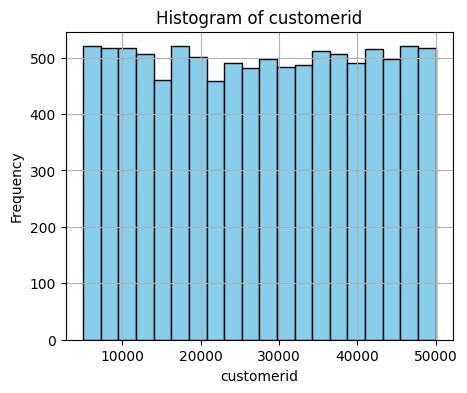

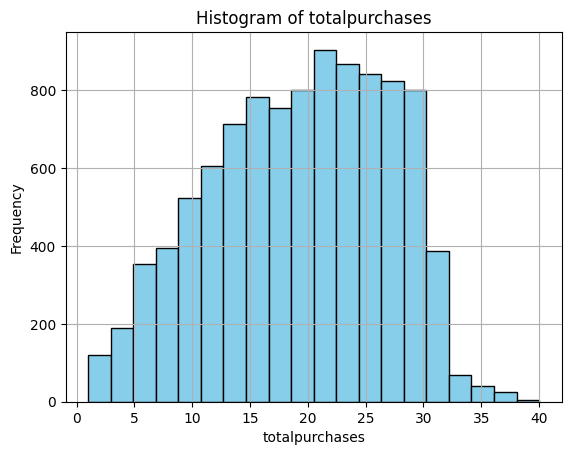

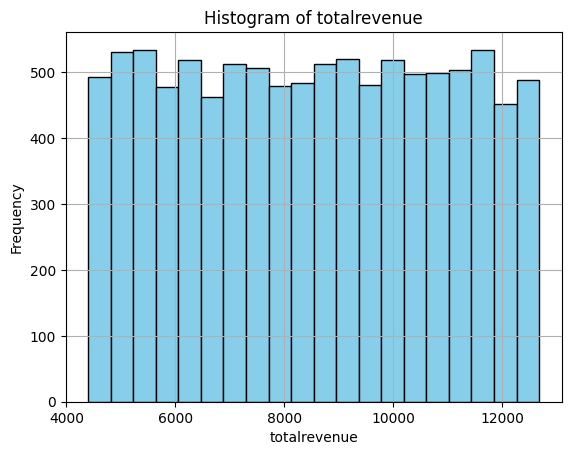

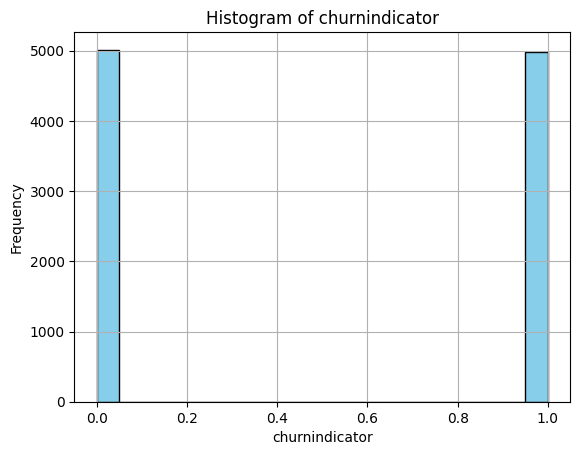

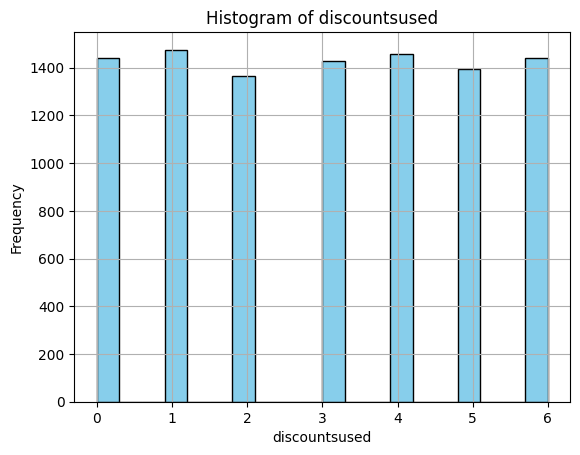

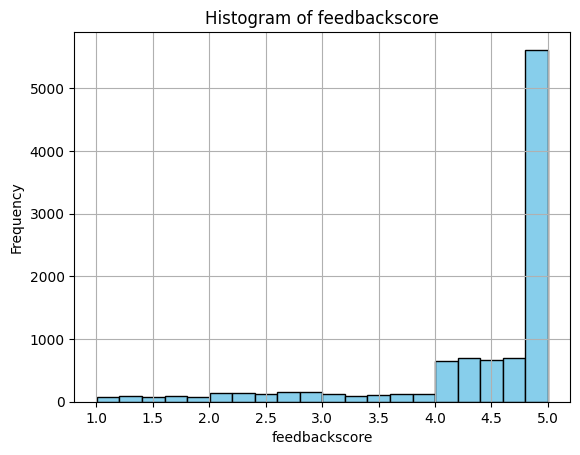

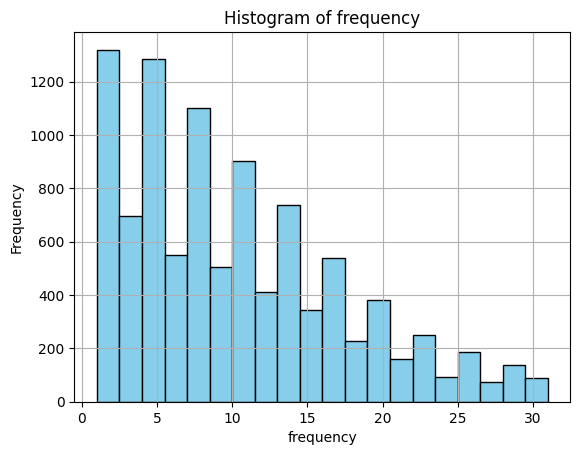

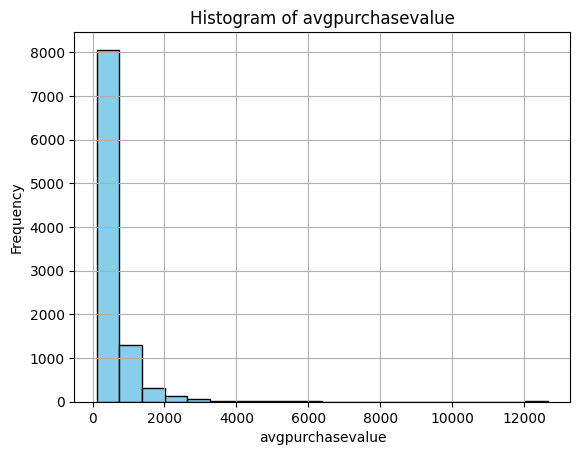

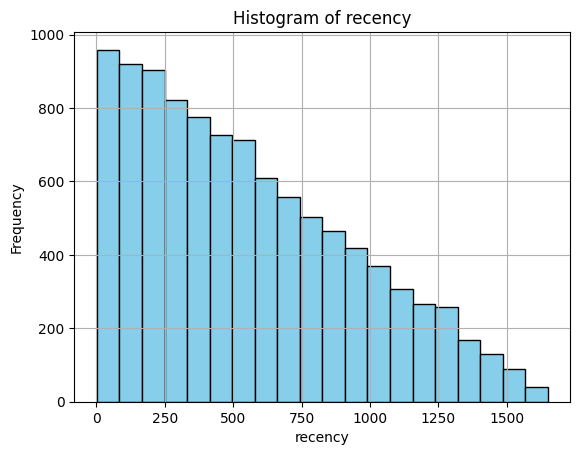

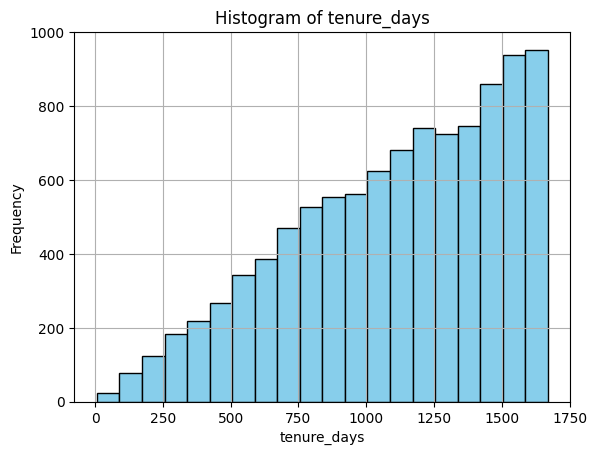

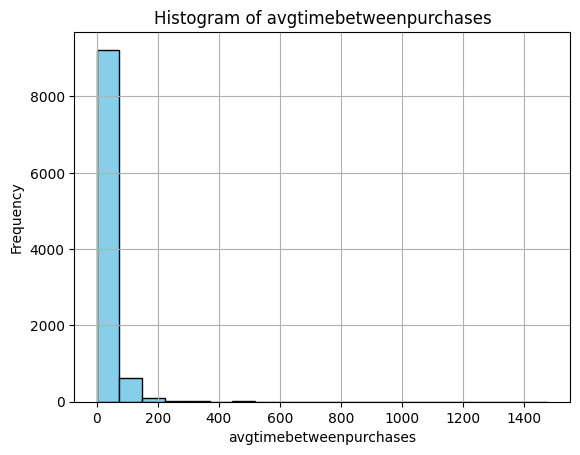

In [20]:
#Plot histograms for all numerical columns in the dataset. What distributions can you identify based on the histograms?
# Assuming 'data' is your DataFrame containing numerical columns
plt.figure(figsize=(5,4))
num_col = Data.select_dtypes(include='number')
for i, column in enumerate(num_col.columns):
    plt.hist(Data[column].dropna(), bins=20, edgecolor='black', color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


What distributions can you identify based on the histograms?

*   Normal Distribution
*   Skewed Distribution
*   Bimodal or Multimodal Distribution
*   Unimodel Distribution

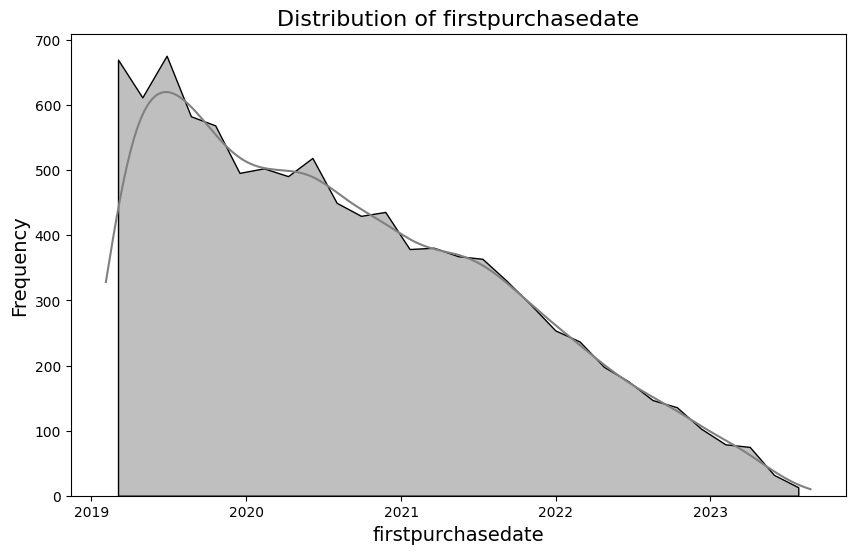

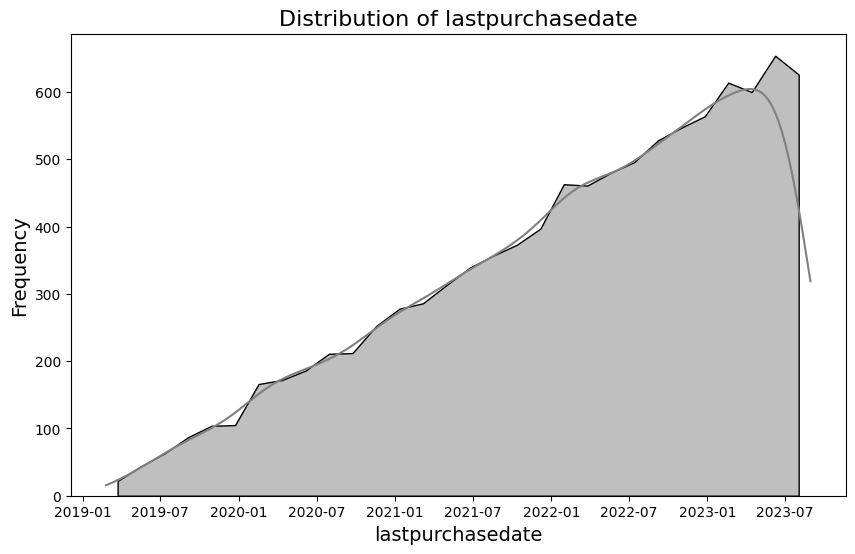

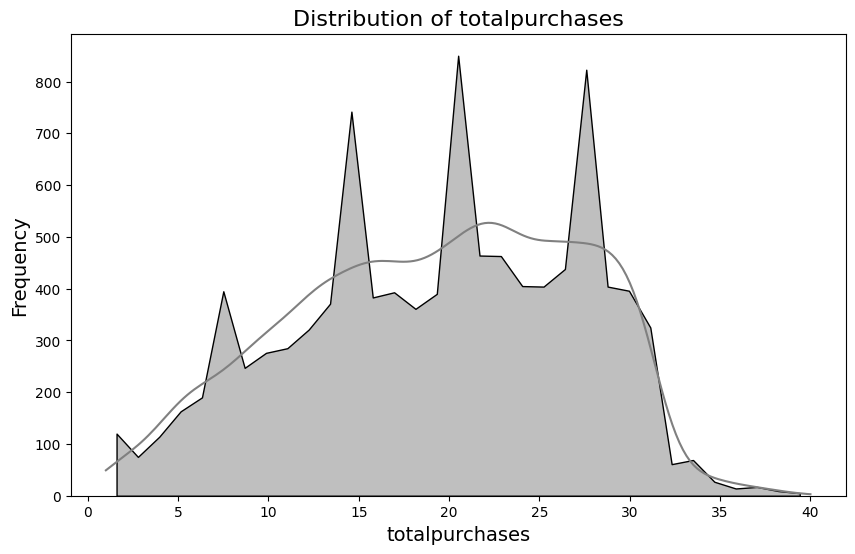

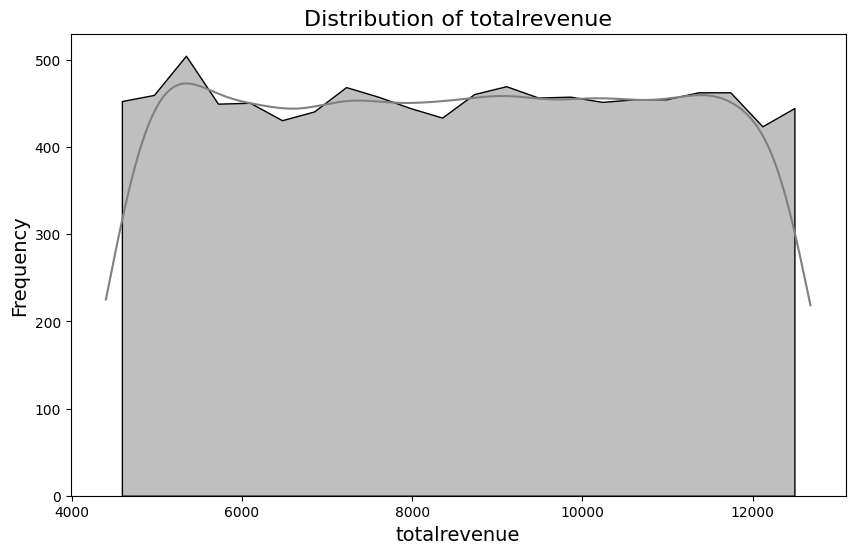

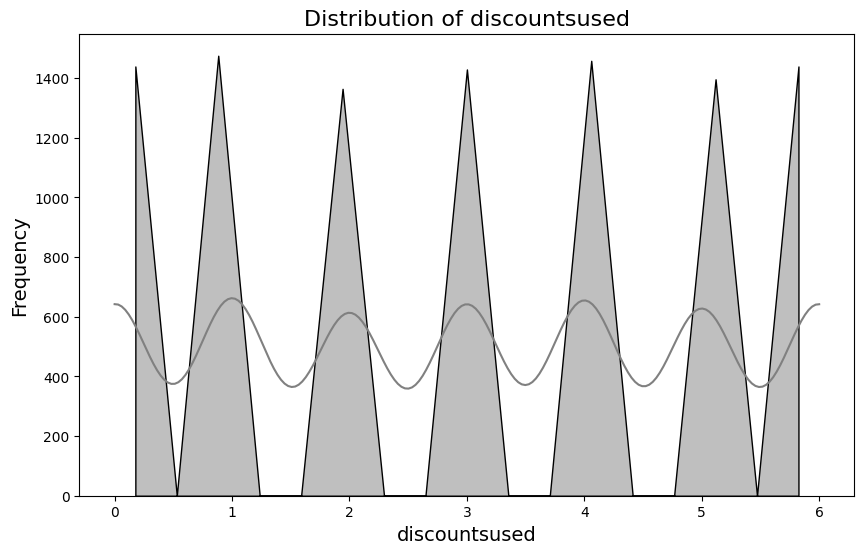

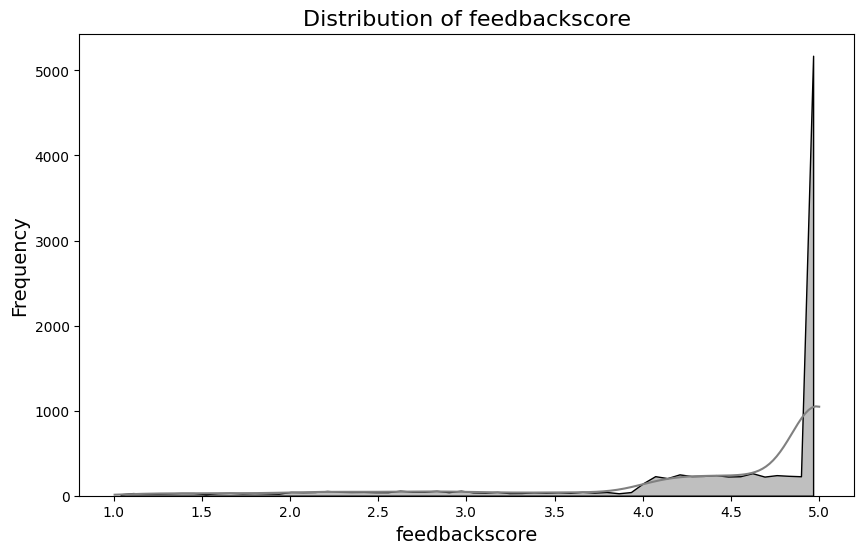

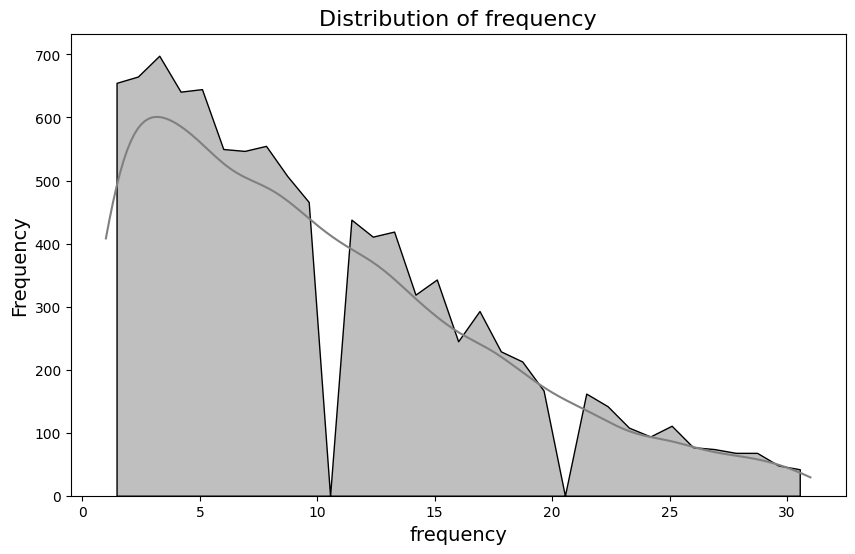

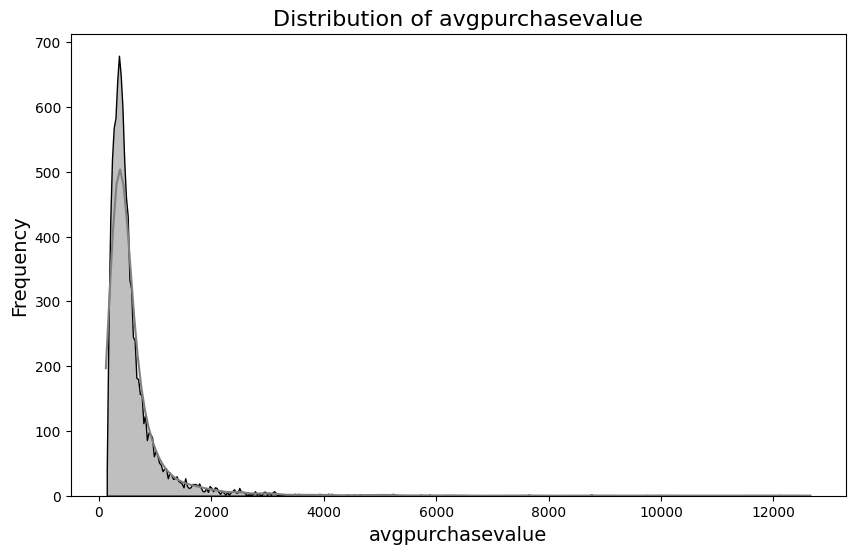

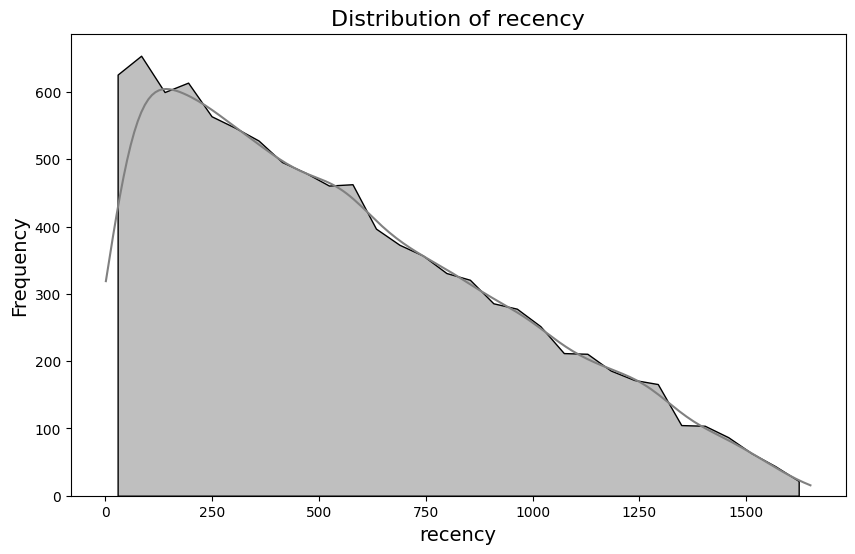

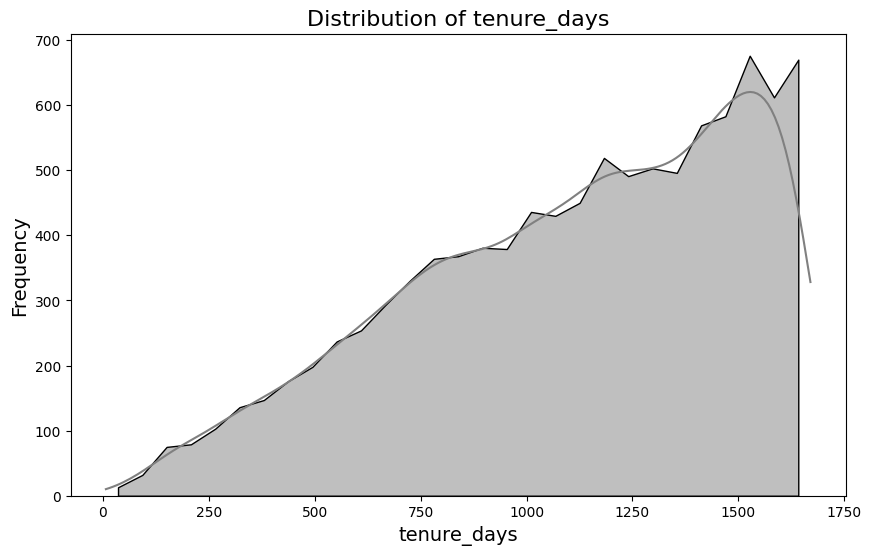

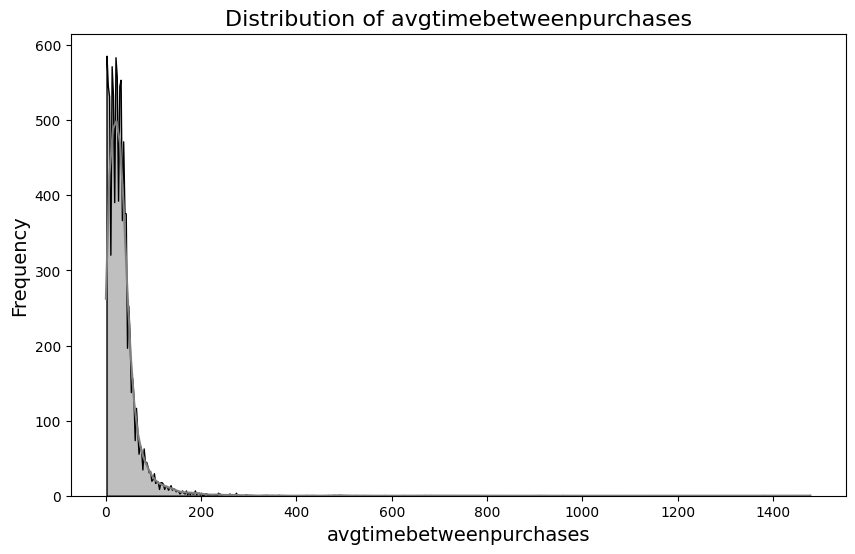

In [21]:
#2. For each categorical column, generate bar plots depicting the frequency of each category.
import matplotlib.pyplot as plt
import seaborn as sns
cols_to_plot =['firstpurchasedate','lastpurchasedate','totalpurchases','totalrevenue','discountsused','feedbackscore',
                'frequency','avgpurchasevalue','recency','tenure_days','avgtimebetweenpurchases']

for column in cols_to_plot:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(Data, x=Data[column], element="poly", kde=True, color='Grey', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

#Which category dominates in each column?
Frequency

### Bivariate Analysis:
    1. Construct a correlation matrix for all the numerical features in the dataset. Which pairs of features are highly correlated? Are there any unexpected correlations?
    2. Use box plots to compare the distribution of a chosen numerical column (e.g., TotalRevenue) across different categories in the dataset. Which category tends to have higher values for the chosen numerical column?


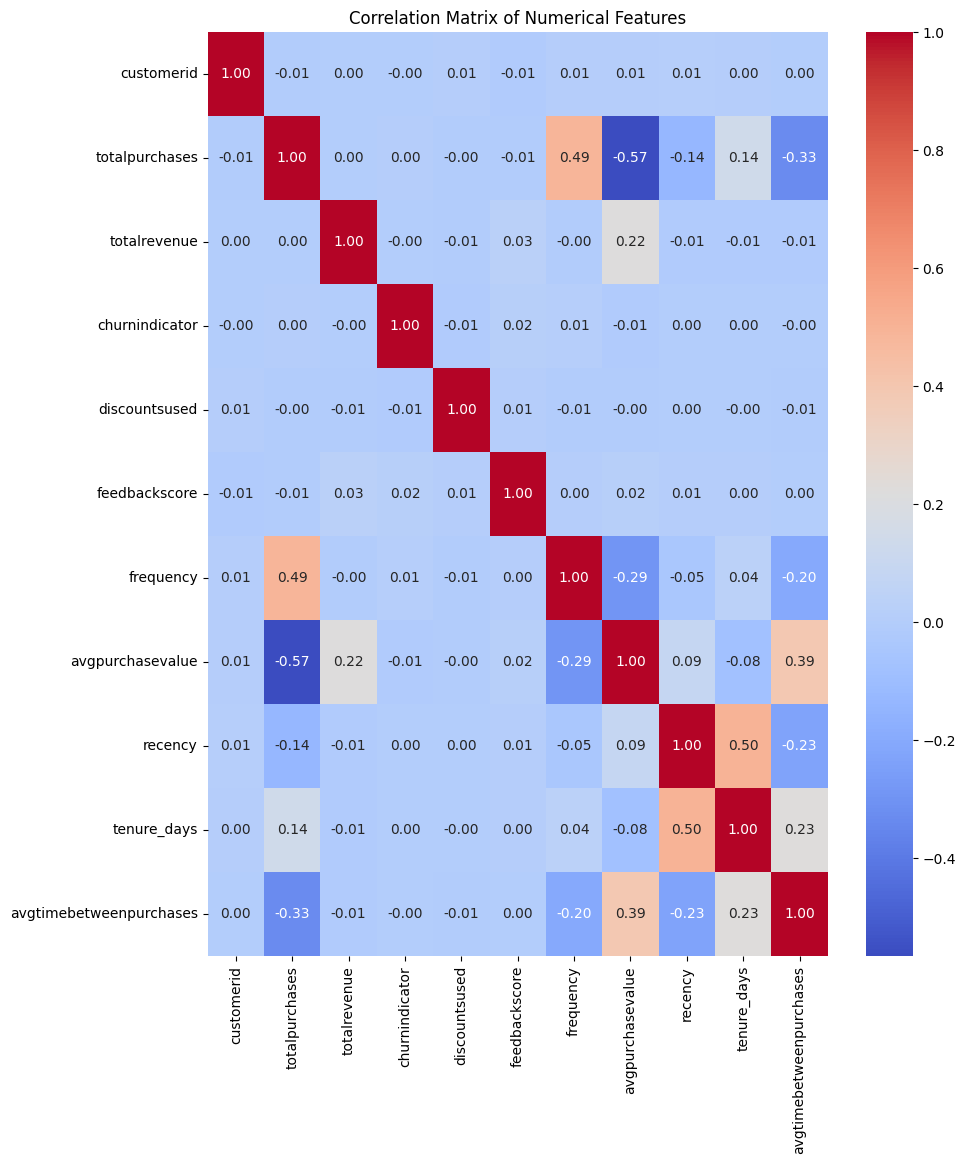

In [22]:
num_features = Data.select_dtypes(include='number')

# Constructing the correlation matrix
correlation_matrix = num_features.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Which pairs of features are highly correlated? Are there any unexpected correlations?


    Recancy and tenure_days are highly corelated

    Avgtimebetweenpurchases and Avgpurchasevalue are highly corelated
    
    Frequency and totalpurchases are highly corelated

    Avgpurchasevalue with totalpurchases is highly negatively corelated

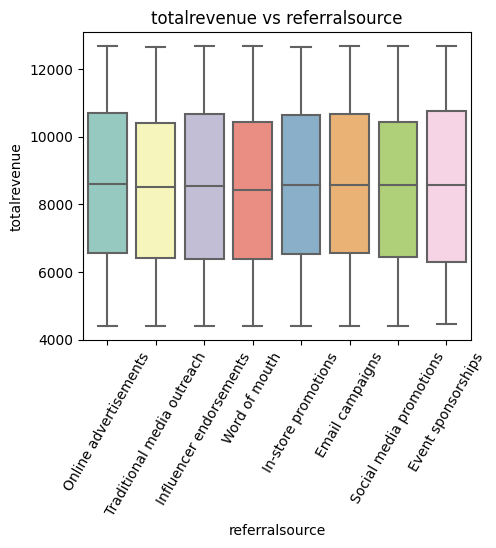

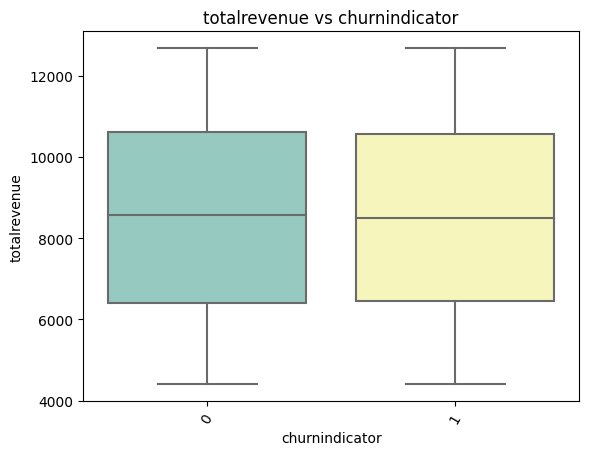

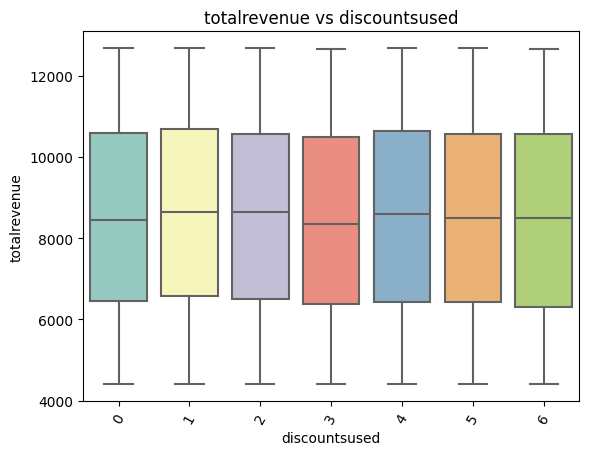

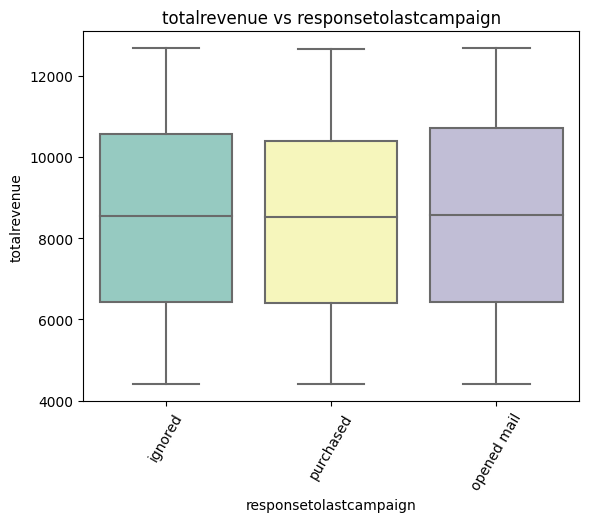

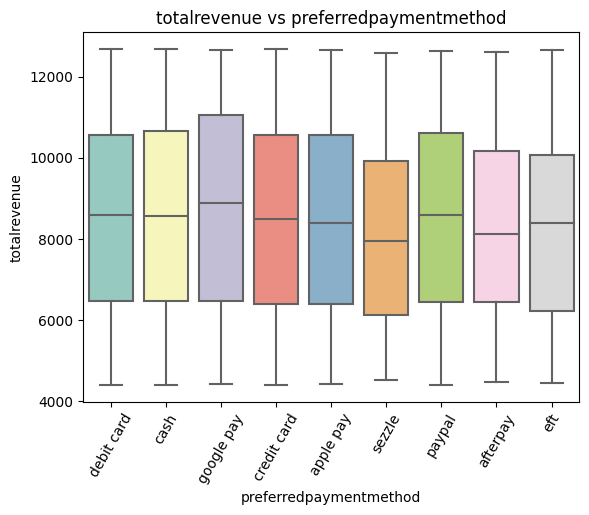

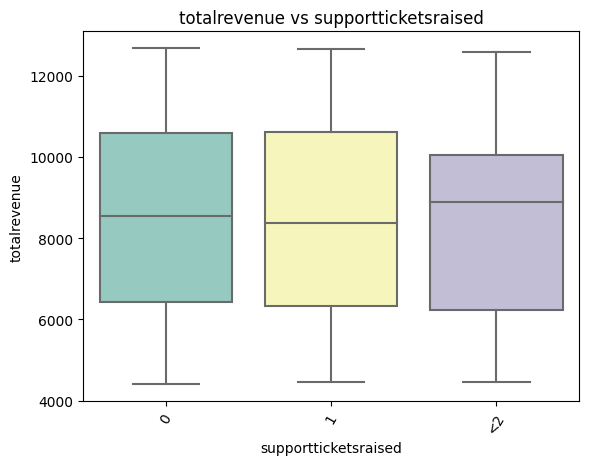

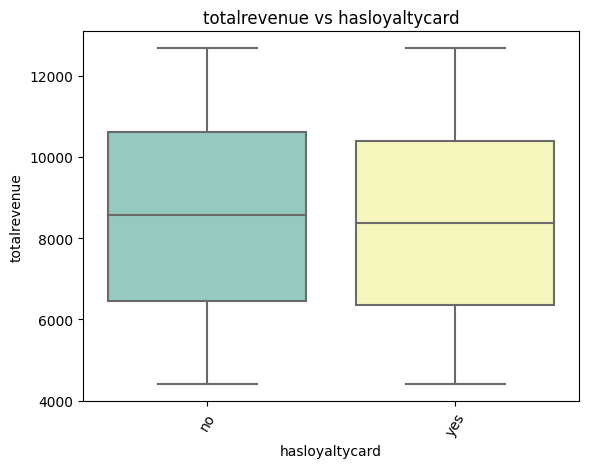

In [23]:
#2. Use box plots to compare the distribution of a chosen numerical column (e.g., TotalRevenue) across different categories in the dataset.
cat_cols = ['referralsource', 'churnindicator', 'discountsused', 'responsetolastcampaign',
            'preferredpaymentmethod', 'supportticketsraised', 'hasloyaltycard']
num_col = 'totalrevenue'  # Numerical column of interest

plt.figure(figsize=(5, 4))
for i, column in enumerate(cat_cols, 1):
    sns.boxplot(x=column, y=num_col, data=Data, palette='Set3')
    plt.title(f'{num_col} vs {column}')
    plt.xlabel(column)
    plt.xticks(rotation=60)
    plt.ylabel(num_col)
    plt.show()

### Advanced Analysis:
    1. Use a pair plot to visualize relationships between a select set of columns (totalpurchases, totalrevenue, avgpurchasevalue, frequency). Can you identify any clusters or outliers from the plots?
    2. Analyze the total revenue trend based on the year of the first purchase. In which year did customers contribute the most to total revenue?
    3. Use the RFM (Recency, Frequency, Monetary) model to identify the top 5% of customers. List their customerid and associated RFM_Score.


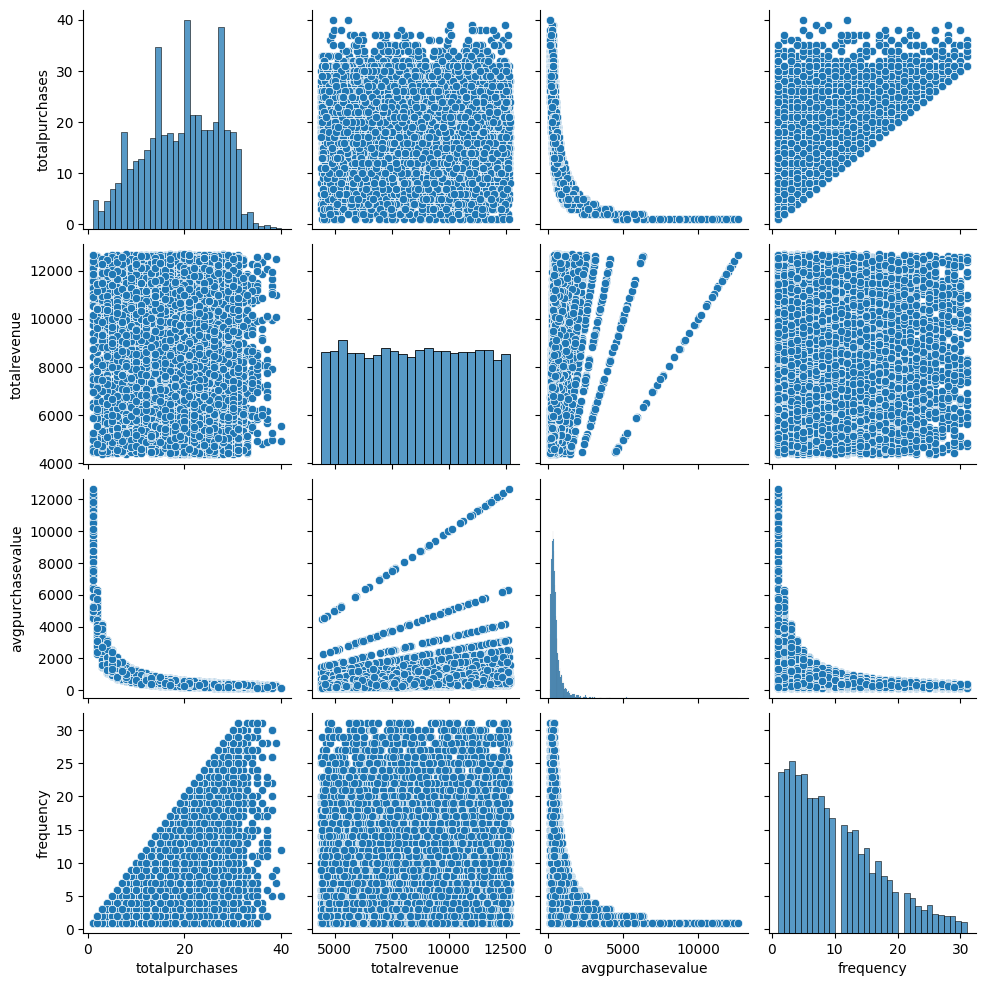

In [24]:
#1.Use a pair plot to visualize relationships between a select set of columns
# (totalpurchases, totalrevenue, avgpurchasevalue, frequency). Can you identify any clusters or outliers from the plots?

set_of_col =['totalpurchases','totalrevenue','avgpurchasevalue','frequency']
Pcol_data = Data[set_of_col]
sns.pairplot(Pcol_data)
plt.show()

 Can you identify any clusters or outliers from the plots?

 =>> No, we didn't see any outliers from above plots

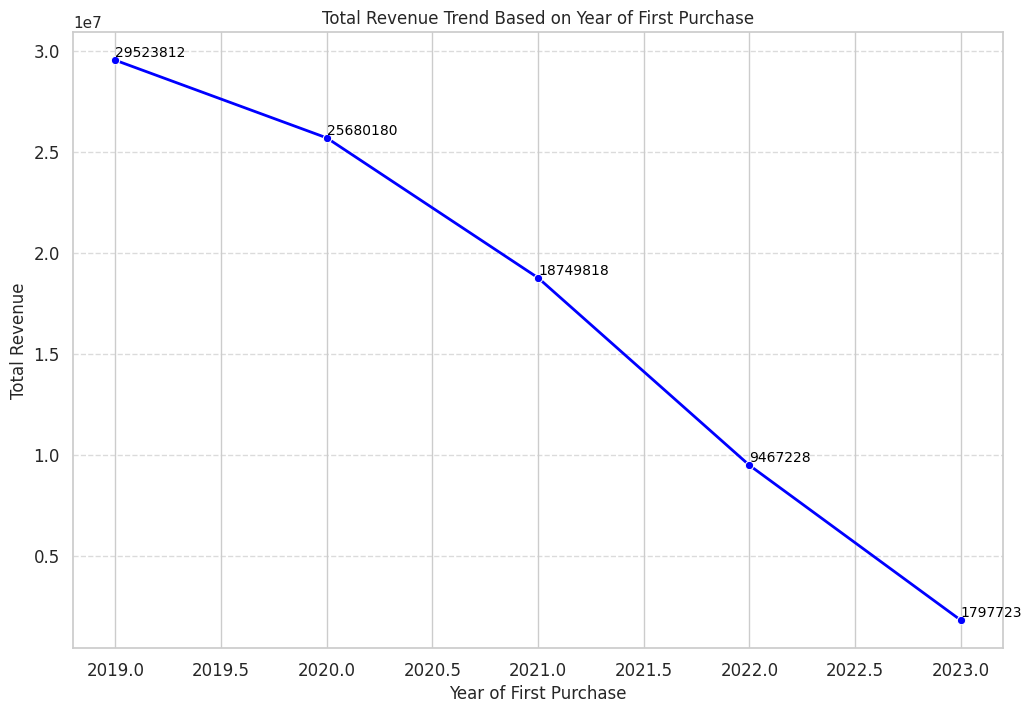

In [25]:
#2. Analyze the total revenue trend based on the year of the first purchase.

Data['year_of_firstpurchase'] = Data['firstpurchasedate'].dt.year
revenue_D = Data.groupby('year_of_firstpurchase')['totalrevenue'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.lineplot(x='year_of_firstpurchase', y='totalrevenue', data=revenue_D, marker='o', color='blue',linewidth=2)

for i, point in revenue_D.iterrows():
    plt.text(point['year_of_firstpurchase'], point['totalrevenue'], f'{point["totalrevenue"]}', ha='left', va='bottom',fontsize=10, color='black')

plt.title('Total Revenue Trend Based on Year of First Purchase')
plt.xlabel('Year of First Purchase')
plt.ylabel('Total Revenue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#In which year did customers contribute the most to total revenue?

The line chart illustrates that the year '2019' recorded the highest customer contribution to the total revenue based on the trend depicted in the graph.

In [26]:
# 3. Use the RFM (Recency, Frequency, Monetary)
# model to identify the top 5% of customers. List their customerid and associated RFM_Score.

rfm_cust = Data.groupby('customerid').agg({
    'recency': 'sum', 'frequency': 'sum','totalrevenue': 'sum'}).rename(columns=
     {'recency': 'Recency','frequency': 'Frequency','totalrevenue': 'Monetary'}).reset_index()

rfm_cust

customerid  Recency  Frequency  Monetary
0           5000      602          3     12490
1           5001      772         14     12432
2           5004     1418          7     12068
3           5007       32         16     10037
4           5013     1248          6     10320
...          ...      ...        ...       ...
9995       49978     1172         10      9688
9996       49980      230          5      5494
9997       49984     1225          8      7586
9998       49991      775          7      4784
9999       49994      239         12      6749

[10000 rows x 4 columns]

In [27]:
#standardizing rfm data
from sklearn.preprocessing import StandardScaler
st_sc = StandardScaler()
normalized_v = pd.DataFrame(st_sc.fit_transform(rfm_cust), columns=rfm_cust.columns)
normalized_v

customerid   Recency  Frequency  Monetary
0      -1.716707  0.124842  -0.993717  1.661462
1      -1.716631  0.558224   0.555950  1.637177
2      -1.716402  2.205073  -0.430202  1.484770
3      -1.716174 -1.328260   0.837708  0.634386
4      -1.715716  1.771692  -0.571081  0.752878
...          ...       ...        ...       ...
9995    1.712097  1.577945  -0.007565  0.488259
9996    1.712250 -0.823498  -0.711960 -1.267778
9997    1.712555  1.713058  -0.289323 -0.391853
9998    1.713088  0.565871  -0.430202 -1.565057
9999    1.713317 -0.800555   0.274193 -0.742307

[10000 rows x 4 columns]

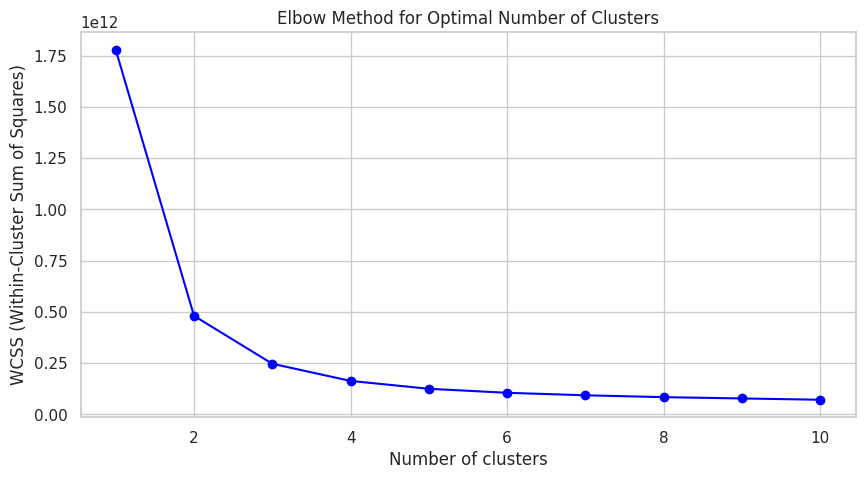

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume 'rfm_cust' is your normalized RFM dataset
G = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_cust)
    G.append(kmeans.inertia_)

# Plotting the Elbow method with modified line style, marker, and color
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), G, marker='o', linestyle='-', color='blue')  # Modified line style, marker, and color
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# You can continue with the optimal number of clusters based on your analysis of the plot
# For instance, assuming you find the optimal_clusters based on the plot
k_clusters = 4
kmeans = KMeans(n_clusters=k_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(rfm_cust)

# Assign the clusters to the dataset
rfm_cust['Cluster'] = clusters


In [29]:
#fitting & predicting cluster on normalized/standardized data
from sklearn.cluster import KMeans

# Fitting K Means to the Datatset using k = 4

kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(rfm_cust)
rfm_cust['Cluster_ID'] = y_kmeans
rfm_cust

customerid  Recency  Frequency  Monetary  Cluster  Cluster_ID
0           5000      602          3     12490        0           1
1           5001      772         14     12432        0           1
2           5004     1418          7     12068        0           1
3           5007       32         16     10037        0           1
4           5013     1248          6     10320        0           1
...          ...      ...        ...       ...      ...         ...
9995       49978     1172         10      9688        3           2
9996       49980      230          5      5494        3           2
9997       49984     1225          8      7586        3           2
9998       49991      775          7      4784        3           2
9999       49994      239         12      6749        3           2

[10000 rows x 6 columns]

In [30]:
#calculating rfm score :
# formula used is weighted combination: 15% Recency score + 28% Frequency score + 57% Monetary score.
rfm_cust['RFM_Score'] = 0.15*rfm_cust['Recency']+0.28 * rfm_cust['Frequency']+0.57*rfm_cust['Monetary']
rfm_cust = rfm_cust.round(2)
rfm_cust[['customerid', 'RFM_Score']]

customerid  RFM_Score
0           5000    7210.44
1           5001    7205.96
2           5004    7093.42
3           5007    5730.37
4           5013    6071.28
...          ...        ...
9995       49978    5700.76
9996       49980    3167.48
9997       49984    4510.01
9998       49991    2845.09
9999       49994    3886.14

[10000 rows x 2 columns]

In [31]:
#Identifying top 5% customers based on rfm score(with highest rfmm score)
rfm_cust = rfm_cust.sort_values(by='RFM_Score', ascending=False)

# threshold for first 5% customers
threshold_index = int(0.05 * len(rfm_cust))
top_5= rfm_cust.iloc[threshold_index]['RFM_Score']

top_5customers = rfm_cust[rfm_cust['RFM_Score'] >= top_5]
top_5customers[['customerid', 'RFM_Score']]

customerid  RFM_Score
5290       28980    7438.48
9653       48461    7423.81
3159       19000    7414.19
642         7760    7396.31
3957       22792    7391.14
...          ...        ...
6865       36170    7067.74
5284       28967    7065.73
2034       13901    7065.59
6617       35043    7065.57
8284       42483    7064.97

[501 rows x 2 columns]

### Multivariate Analysis:
    1. Create a scatter plot of totalrevenue vs. frequency and color the data points based on the churnindicator. What patterns do you observe concerning customer churn?
    2. Use the parallel coordinates plot to visualize multi-dimensional relationships using the columns totalpurchases, totalrevenue, avgpurchasevalue, frequency, and hasloyaltycard. Do any patterns emerge based on loyalty card holders?

In [32]:
#1. Create a scatter plot of totalrevenue vs. frequency and color the data points based on the churnindicator.
# What patterns do you observe concerning customer churn?
fig_data = px.scatter(Data, x='totalrevenue', y='frequency', color='churnindicator',
                 title='The association between revenue and purchase frequency',
                 labels={'totalrevenue': 'Total Revenue', 'frequency': 'Frequency'},
                 opacity=0.4)
fig_data.update_layout(showlegend=True)
fig_data.show()

In [33]:
#2. Use the parallel coordinates plot to visualize multi-dimensional relationships using the columns totalpurchases, totalrevenue, avgpurchasevalue, frequency, and hasloyaltycard.

Data['hasloyaltycard'].unique()

array(['no', 'yes'], dtype=object)

In [34]:
Data["hasloyaltycard"] = Data["hasloyaltycard"].map({"no": 0, "yes": 1})

Data.head()

customerid firstpurchasedate lastpurchasedate  totalpurchases  \
0        8519        2021-12-31       2022-03-06               7   
1       38152        2019-09-27       2023-02-02              20   
2       19680        2021-06-13       2022-02-04              29   
3       35744        2021-07-28       2022-08-21              15   
4       11663        2021-01-19       2022-03-10              13   

   totalrevenue              referralsource  churnindicator  discountsused  \
0         11670       Online advertisements               0              2   
1          5260  Traditional media outreach               1              6   
2          9790     Influencer endorsements               0              2   
3          9591     Influencer endorsements               0              5   
4         10134               Word of mouth               0              3   

  productcategory responsetolastcampaign  feedbackscore  \
0             Q02                ignored       4.729998   
1             F76              purchased       4.184512   
2             X04            opened mail       4.346640   
3             A25                ignored       5.000000   
4             A16                ignored       4.482089   

  preferredpaymentmethod supportticketsraised  hasloyaltycard  frequency  \
0             debit card                    0               0          7   
1                   cash                    0               0          2   
2             google pay                    0               0          4   
3             debit card                    0               0         13   
4            credit card                    0               0         11   

   avgpurchasevalue  recency  tenure_days  avgtimebetweenpurchases  \
0       1667.142857      544          609                        9   
1        263.000000      211         1435                       61   
2        337.586207      574          810                        8   
3        639.400000      376          765                       25   
4        779.538462      540          955                       31   

   year_of_firstpurchase  
0                   2021  
1                   2019  
2                   2021  
3                   2021  
4                   2021

In [35]:
# clv_analysis :
graph = ["totalpurchases", "totalrevenue", "avgpurchasevalue", "frequency", "hasloyaltycard"]
graph = Data[graph]

labels_1 = {"totalpurchases": "Total Purchases", "totalrevenue": "Total Revenue", "avgpurchasevalue": "Avg Purchase Value",
                 "frequency": "Frequency", "hasloyaltycard": "Has Loyalty Card"}
figure = px.parallel_coordinates(graph,
                              color="hasloyaltycard",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              labels=labels_1)
figure.update_layout(title="Parallel Coordinates Plot")
figure.show()

# <center> CLV Modelling

### Ridge Regression:
1. Load the dataset and split it into training and testing sets, keeping 20% of the data for testing.
2. Implement a Ridge Regression model using the provided features (`Recency`, `Frequency`, `AvgPurchaseValue`) to predict the `TotalRevenue`.
3. Set the alpha parameter for Ridge Regression to 1.0. How does this value affect the coefficients of the model?
4. Evaluate the model using Mean Squared Error (MSE) on the test set. Report the obtained value.

In [36]:

# Separate features and target variable
X = Data[['recency', 'frequency', 'avgpurchasevalue']]
y = Data['totalrevenue']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit Ridge Regression model
alpha_value = 1.0
ridge_model = Ridge(alpha=alpha_value)
ridge_model.fit(X_train, y_train)

# Coefficients of the model
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) on the test set
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (MSE) on test set: {mse}")


Coefficients: [-0.19351133 22.42931276  0.70074335]
Intercept: 7951.870938941943
Root Mean Squared Error (MSE) on test set: 2349.4077620130256


### Random Forest Regressor:
5. Implement a Random Forest Regressor with 100 trees to predict the CLV.
6. Using the feature importance attribute of the Random Forest model, list the features in order of their importance.
7. Evaluate the model's performance using the test set. How does it compare to the Ridge Regression model?

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# List features in order of importance
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) on the test set
mse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"\nRandom Forest Root Mean Squared Error (MSE) on test set: {mse_rf}")

Feature Importance:
avgpurchasevalue: 0.6178043819989193
recency: 0.23428885776416747
frequency: 0.14790676023691327

Random Forest Root Mean Squared Error (MSE) on test set: 1890.2066684784365


How does it compare to the Ridge Regression model?

==>>Random forest is regressor is performing better than ridge regression model.

### XGBoost:
11. Implement the XGBoost regressor to predict the CLV. Use 100 estimators for the model.
12. XGBoost offers various hyperparameters to tune. Alter the learning rate of the model. How does it impact the model's performance?
13. Evaluate the model using the test data and compare its MSE with previous models.

In [38]:
pip install xgboost

In [39]:
from xgboost import XGBRegressor

learning_rate = 0.1  # Change this value to adjust learning rate
xgb_model = XGBRegressor(n_estimators=100, learning_rate=learning_rate, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) on the test set
mse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost Root Mean Squared Error (MSE) on test set with learning rate {learning_rate}: {mse_xgb}")

XGBoost Root Mean Squared Error (MSE) on test set with learning rate 0.1: 1821.7161284240449


==>> XGboost is good but RMSE is almost same for XGBoost and random Forest. But it is performing good as compared to ridge regression.

### Advanced Regression Model

14. Train other regression models like Ridge, Lasso, Decision Trees, Random Forest, and Gradient Boosting to predict totalrevenue.
15. Use cross-validation for model selection and tuning.
16. Evaluate the models using the same metrics as before and compare their performances.

In [40]:
# merging Original data with rmf_cust
Data_rfm = pd.merge(Data,rfm_cust, on= "customerid" ,how="left")
Data_rfm.head(5)

customerid firstpurchasedate lastpurchasedate  totalpurchases  \
0        8519        2021-12-31       2022-03-06               7   
1       38152        2019-09-27       2023-02-02              20   
2       19680        2021-06-13       2022-02-04              29   
3       35744        2021-07-28       2022-08-21              15   
4       11663        2021-01-19       2022-03-10              13   

   totalrevenue              referralsource  churnindicator  discountsused  \
0         11670       Online advertisements               0              2   
1          5260  Traditional media outreach               1              6   
2          9790     Influencer endorsements               0              2   
3          9591     Influencer endorsements               0              5   
4         10134               Word of mouth               0              3   

  productcategory responsetolastcampaign  ...  recency tenure_days  \
0             Q02                ignored  ...      544         609   
1             F76              purchased  ...      211        1435   
2             X04            opened mail  ...      574         810   
3             A25                ignored  ...      376         765   
4             A16                ignored  ...      540         955   

  avgtimebetweenpurchases  year_of_firstpurchase  Recency  Frequency  \
0                       9                   2021      544          7   
1                      61                   2019      211          2   
2                       8                   2021      574          4   
3                      25                   2021      376         13   
4                      31                   2021      540         11   

   Monetary  Cluster  Cluster_ID  RFM_Score  
0     11670        0           1    6735.46  
1      5260        1           0    3030.41  
2      9790        2           3    5667.52  
3      9591        1           0    5526.91  
4     10134        0           1    5860.46  

[5 rows x 26 columns]

In [41]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score

X = Data_rfm[['totalpurchases','churnindicator','discountsused','feedbackscore','frequency',
        'avgpurchasevalue','recency','tenure_days','avgtimebetweenpurchases','RFM_Score']]
y = Data_rfm["totalrevenue"]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create models
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

models = [
    ('Ridge Regression', ridge_model),
    ('Lasso Regression', lasso_model),
    ('Decision Tree', decision_tree_model),
    ('Random Forest', random_forest_model),
    ('Gradient Boosting', gradient_boosting_model)
]

# Evaluate models using cross-validation and compare performances
for name, model in models:
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mse = -cv_scores.mean()

    # Fit model on full training set
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE on test set
    mse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"Model: {name}")
    print(f"Cross-Validation Mean Squared Error (MSE): {cv_mse}")
    print(f"Test Set root Mean Squared Error (MSE): {mse}")
    print("------------------------")

Model: Ridge Regression
Cross-Validation Mean Squared Error (MSE): 1.5589240812236044e-10
Test Set root Mean Squared Error (MSE): 1.0110592668272294e-05
------------------------
Model: Lasso Regression
Cross-Validation Mean Squared Error (MSE): 0.02301835587985287
Test Set root Mean Squared Error (MSE): 0.14811146638443376
------------------------
Model: Decision Tree
Cross-Validation Mean Squared Error (MSE): 1047.210375
Test Set root Mean Squared Error (MSE): 29.781479143924333
------------------------
Model: Random Forest
Cross-Validation Mean Squared Error (MSE): 289.0136527749998
Test Set root Mean Squared Error (MSE): 15.334991040101714
------------------------
Model: Gradient Boosting
Cross-Validation Mean Squared Error (MSE): 597.1105326955836
Test Set root Mean Squared Error (MSE): 23.09527242305524
------------------------


### Hyperparameter Tuning:

17. For models that have hyperparameters, use techniques like GridSearchCV or RandomizedSearchCV to find optimal values.
18. Re-evaluate the models using the optimized hyperparameters.

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression - GridSearchCV for hyperparameter tuning
ridge = Ridge()
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0]}  # Example values for alpha
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)
ridge_best_params = ridge_grid_search.best_params_
ridge_best_model = ridge_grid_search.best_estimator_

# Random Forest - RandomizedSearchCV for hyperparameter tuning
random_forest = RandomForestRegressor()
rf_param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_random_search = RandomizedSearchCV(random_forest, rf_param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_random_search.fit(X_train, y_train)
rf_best_params = rf_random_search.best_params_
rf_best_model = rf_random_search.best_estimator_

# Gradient Boosting - RandomizedSearchCV for hyperparameter tuning
gradient_boosting = GradientBoostingRegressor()
gb_param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}
gb_random_search = RandomizedSearchCV(gradient_boosting, gb_param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
gb_random_search.fit(X_train, y_train)
gb_best_params = gb_random_search.best_params_
gb_best_model = gb_random_search.best_estimator_

# Re-evaluate models using optimized hyperparameters
models = [
    ('Ridge Regression', ridge_best_model),
    ('Random Forest', rf_best_model),
    ('Gradient Boosting', gb_best_model)
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Model: {name}")
    print(f"Best Parameters: {model.get_params()}")
    print(f"Test Set Root Mean Squared Error (MSE): {mse}")
    print("------------------------")


Model: Ridge Regression
Best Parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
Test Set Root Mean Squared Error (MSE): 1.0110628646409286e-06
------------------------
Model: Random Forest
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 15, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Test Set Root Mean Squared Error (MSE): 15.262870719886665
------------------------
Model: Gradient Boosting
Best Parameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.2, 'loss': 'squared_error', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, '

### Feature Importance:

19. For tree-based models like Random Forest and Gradient Boosting, extract feature importance scores.
20. Analyze and interpret the top features affecting totalrevenue.

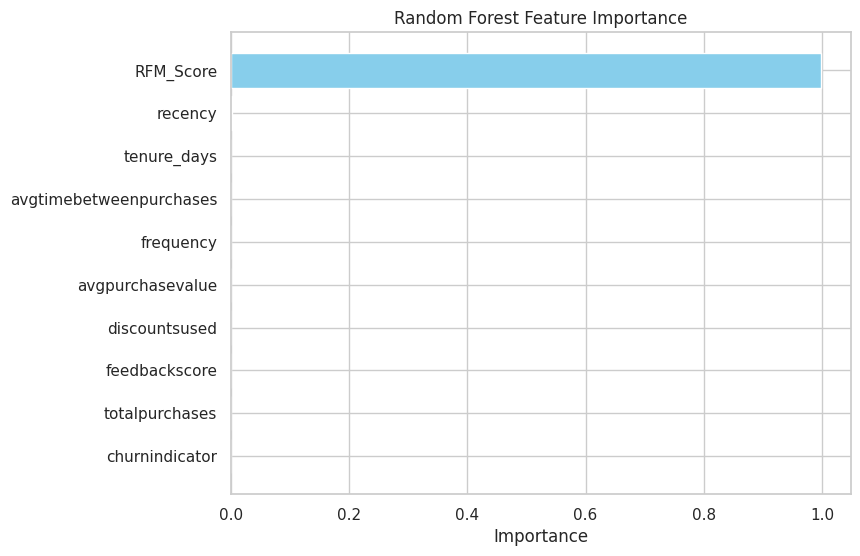

                   Feature  Importance
9                RFM_Score    0.998370
6                  recency    0.001592
7              tenure_days    0.000008
8  avgtimebetweenpurchases    0.000007
4                frequency    0.000006
5         avgpurchasevalue    0.000005
2            discountsused    0.000004
3            feedbackscore    0.000004
0           totalpurchases    0.000004
1           churnindicator    0.000001


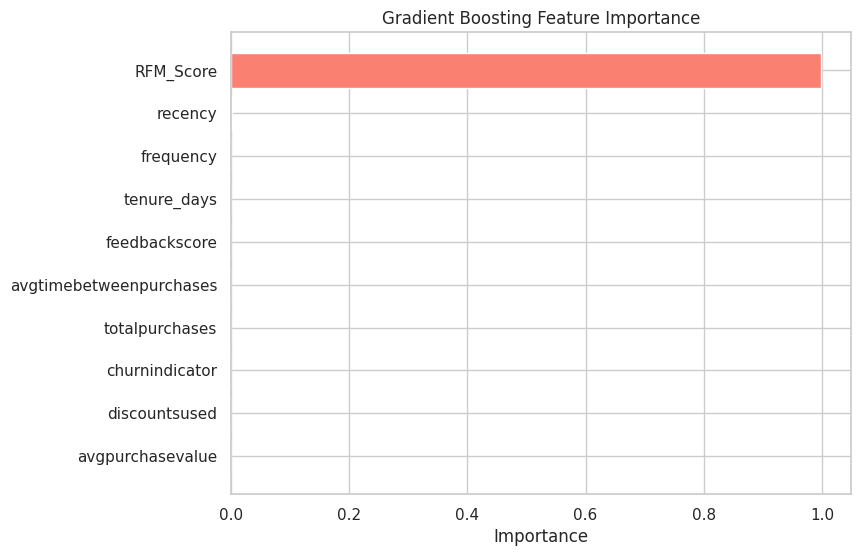

                   Feature    Importance
9                RFM_Score  9.984449e-01
6                  recency  1.553454e-03
4                frequency  1.531398e-06
7              tenure_days  5.273201e-08
3            feedbackscore  4.580627e-08
8  avgtimebetweenpurchases  3.934556e-08
0           totalpurchases  0.000000e+00
1           churnindicator  0.000000e+00
2            discountsused  0.000000e+00
5         avgpurchasevalue  0.000000e+00


In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt



# Random Forest model to extract feature importance
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X, y)

# Extract feature importances from Random Forest model
feature_importances_rf = random_forest_model.feature_importances_

# Create a DataFrame to display feature importance scores for Random Forest
importance_rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})
importance_rf_df = importance_rf_df.sort_values(by='Importance', ascending=False)

# Plot feature importance for Random Forest
plt.figure(figsize=(8, 6))
plt.barh(importance_rf_df['Feature'], importance_rf_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()
print(importance_rf_df)

# Gradient Boosting model to extract feature importance
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_model.fit(X, y)

# Extract feature importances from Gradient Boosting model
feature_importances_gb = gradient_boosting_model.feature_importances_

# Create a DataFrame to display feature importance scores for Gradient Boosting
importance_gb_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_gb})
importance_gb_df = importance_gb_df.sort_values(by='Importance', ascending=False)

# Plot feature importance for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.barh(importance_gb_df['Feature'], importance_gb_df['Importance'], color='salmon')
plt.xlabel('Importance')
plt.title('Gradient Boosting Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()
print(importance_gb_df)

In [44]:
Data_rfm.head(5)

customerid firstpurchasedate lastpurchasedate  totalpurchases  \
0        8519        2021-12-31       2022-03-06               7   
1       38152        2019-09-27       2023-02-02              20   
2       19680        2021-06-13       2022-02-04              29   
3       35744        2021-07-28       2022-08-21              15   
4       11663        2021-01-19       2022-03-10              13   

   totalrevenue              referralsource  churnindicator  discountsused  \
0         11670       Online advertisements               0              2   
1          5260  Traditional media outreach               1              6   
2          9790     Influencer endorsements               0              2   
3          9591     Influencer endorsements               0              5   
4         10134               Word of mouth               0              3   

  productcategory responsetolastcampaign  ...  recency tenure_days  \
0             Q02                ignored  ...      544         609   
1             F76              purchased  ...      211        1435   
2             X04            opened mail  ...      574         810   
3             A25                ignored  ...      376         765   
4             A16                ignored  ...      540         955   

  avgtimebetweenpurchases  year_of_firstpurchase  Recency  Frequency  \
0                       9                   2021      544          7   
1                      61                   2019      211          2   
2                       8                   2021      574          4   
3                      25                   2021      376         13   
4                      31                   2021      540         11   

   Monetary  Cluster  Cluster_ID  RFM_Score  
0     11670        0           1    6735.46  
1      5260        1           0    3030.41  
2      9790        2           3    5667.52  
3      9591        1           0    5526.91  
4     10134        0           1    5860.46  

[5 rows x 26 columns]

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


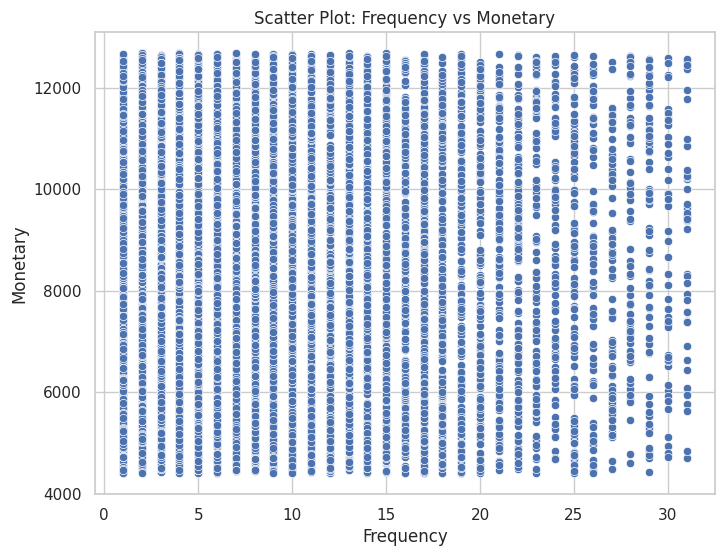

In [46]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Frequency', y='Monetary', data=Data_rfm)
plt.title('Scatter Plot: Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

In [47]:
# Plot 1: Comparing Total Purchases and Total Revenue for each Product Category
plt.figure(figsize=(12, 6))
sns.scatterplot(x='totalpurchases', y='totalrevenue', hue='productcategory', data=Data_rfm, palette='viridis')
plt.title('Total Purchases vs Total Revenue by Product Category')
plt.xlabel('Total Purchases')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

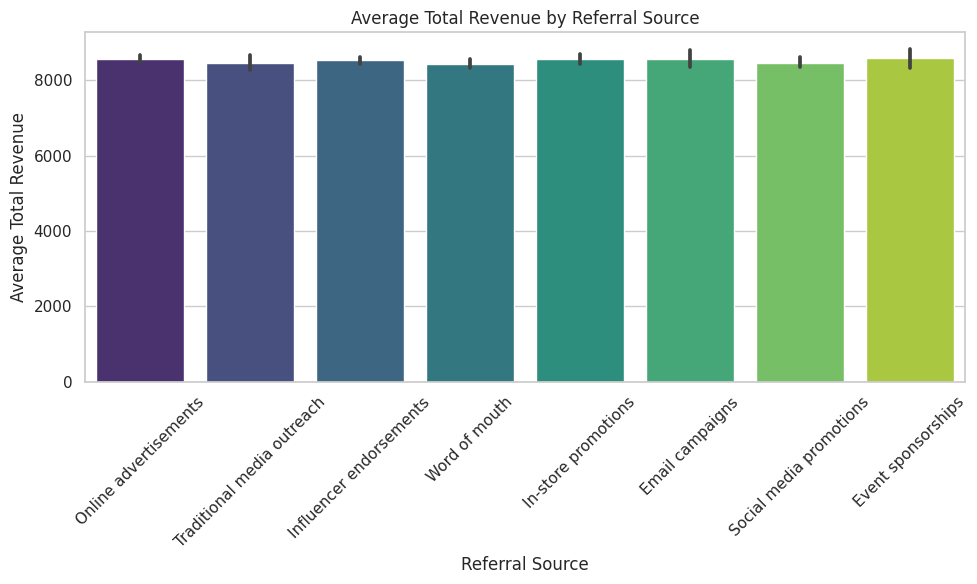

In [48]:
# Plot : Average Total Revenue by Referral Source
plt.figure(figsize=(10, 6))
sns.barplot(x='referralsource', y='totalrevenue', data=Data_rfm, palette='viridis')
plt.title('Average Total Revenue by Referral Source')
plt.xlabel('Referral Source')
plt.ylabel('Average Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

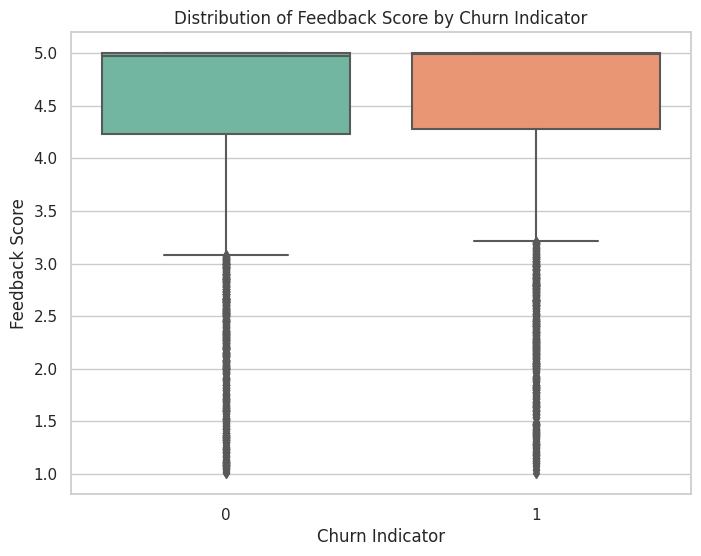

In [49]:
# Plot : Distribution of Feedback Score by Churn Indicator
plt.figure(figsize=(8, 6))
sns.boxplot(x='churnindicator', y='feedbackscore', data=Data_rfm, palette='Set2')
plt.title('Distribution of Feedback Score by Churn Indicator')
plt.xlabel('Churn Indicator')
plt.ylabel('Feedback Score')
plt.show()

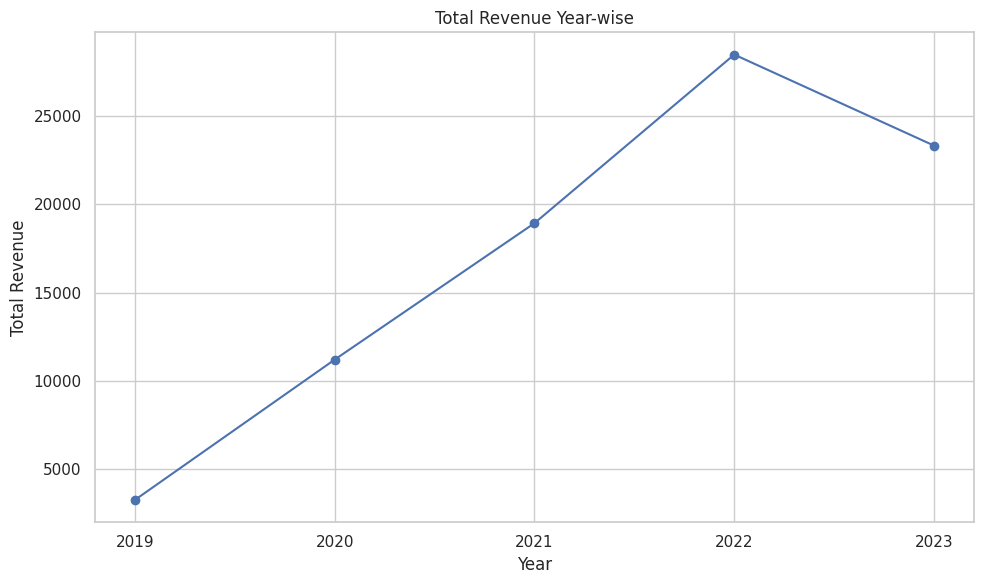

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it contains a column 'lastpurchasedate' or 'date' for time reference

# Convert 'lastpurchasedate' column to datetime if it's not in datetime format
Data_rfm['lastpurchasedate'] = pd.to_datetime(Data_rfm['lastpurchasedate'])

# Extract year from 'lastpurchasedate'
Data_rfm['Year'] = Data_rfm['lastpurchasedate'].dt.year

# Grouping data by year and calculating the sum of total revenue
revenue_yearly = Data_rfm.groupby('Year')['totalrevenue'].sum()/1000

# Plotting the line chart year-wise
plt.figure(figsize=(10, 6))
plt.plot(revenue_yearly.index, revenue_yearly.values, marker='o', linestyle='-')
plt.title('Total Revenue Year-wise')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(revenue_yearly.index)  # Setting x-axis ticks as the years available in the data
plt.tight_layout()
plt.show()
